# 데이터의 결합

***

In [1]:
# 아래의 라이브러리를 사용하므로 미리 임포트해 두기 바랍니다.
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

'%.3f'

## 데이터의 결합
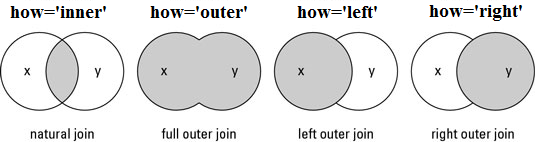

In [2]:
# 데이터 1 생성
data1 = {
    'id': ['100', '101', '102', '103', '104', '106', '108', '110', '111',' 113'],
    'city': ['Seoul', 'Pusan', 'Daegu', 'Gangneung', 'Seoul', 'Seoul', 'Pusan', 'Daegu', 'Gangneung', 'Seoul'],
    'birth_year': [1990, 1989, 1992, 1997, 1982, 1991, 1988, 1990, 1995, 1981],
    'name': ['Junho', 'Heejin', 'Mijung', 'Minho', 'Steeve', 'Mina', 'Sumi', 'Minsu', 'Jinhee','Daeho']
}
df1 = DataFrame(data1)
df1

,id,city,birth_year,name
0,100,Seoul,1990,Junho
1,101,Pusan,1989,Heejin
2,102,Daegu,1992,Mijung
3,103,Gangneung,1997,Minho
4,104,Seoul,1982,Steeve
5,106,Seoul,1991,Mina
6,108,Pusan,1988,Sumi
7,110,Daegu,1990,Minsu
8,111,Gangneung,1995,Jinhee
9,113,Seoul,1981,Daeho


In [3]:
# 데이터 2 생성
data2 = {
    'id': ['100', '101', '102', '105', '107'],
    'math': [50, 43, 33, 76, 98],
    'english': [90, 30, 20, 50, 30],
    'sex': ['M','F','F','M','M'], 
    'index_num': [0, 1, 2, 3, 4]
}
df2 = DataFrame(data2)
df2

,id,math,english,sex,index_num
0,100,50,90,M,0
1,101,43,30,F,1
2,102,33,20,F,2
3,105,76,50,M,3
4,107,98,30,M,4


In [4]:
# 데이터 결합(내부결합. 키는 자동으로 인식하지만 on으로 명시적으로 지정할 수 있음)
print('・결합 테이블')
pd.merge(df1, df2, on = 'id')

・결합 테이블


,id,city,birth_year,name,math,english,sex,index_num
0,100,Seoul,1990,Junho,50,90,M,0
1,101,Pusan,1989,Heejin,43,30,F,1
2,102,Daegu,1992,Mijung,33,20,F,2


In [5]:
# 데이터 결합(전결합)
pd.merge(df1, df2, how = 'outer')

,id,city,birth_year,name,math,english,sex,index_num
0,100,Seoul,1990.0,Junho,50.0,90.0,M,0.0
1,101,Pusan,1989.0,Heejin,43.0,30.0,F,1.0
2,102,Daegu,1992.0,Mijung,33.0,20.0,F,2.0
3,103,Gangneung,1997.0,Minho,NaN,NaN,NaN,NaN
4,104,Seoul,1982.0,Steeve,NaN,NaN,NaN,NaN
5,106,Seoul,1991.0,Mina,NaN,NaN,NaN,NaN
6,108,Pusan,1988.0,Sumi,NaN,NaN,NaN,NaN
7,110,Daegu,1990.0,Minsu,NaN,NaN,NaN,NaN
8,111,Gangneung,1995.0,Jinhee,NaN,NaN,NaN,NaN
9,113,Seoul,1981.0,Daeho,NaN,NaN,NaN,NaN


In [6]:
# index를 이용한 결합
pd.merge(df1, df2, left_index = True, right_on = 'index_num')

,id_x,city,birth_year,name,id_y,math,english,sex,index_num
0,100,Seoul,1990,Junho,100,50,90,M,0
1,101,Pusan,1989,Heejin,101,43,30,F,1
2,102,Daegu,1992,Mijung,102,33,20,F,2
3,103,Gangneung,1997,Minho,105,76,50,M,3
4,104,Seoul,1982,Steeve,107,98,30,M,4


In [7]:
# 데이터 결합(left)
pd.merge(df1, df2, how = 'left')

,id,city,birth_year,name,math,english,sex,index_num
0,100,Seoul,1990,Junho,50.0,90.0,M,0.0
1,101,Pusan,1989,Heejin,43.0,30.0,F,1.0
2,102,Daegu,1992,Mijung,33.0,20.0,F,2.0
3,103,Gangneung,1997,Minho,NaN,NaN,NaN,NaN
4,104,Seoul,1982,Steeve,NaN,NaN,NaN,NaN
5,106,Seoul,1991,Mina,NaN,NaN,NaN,NaN
6,108,Pusan,1988,Sumi,NaN,NaN,NaN,NaN
7,110,Daegu,1990,Minsu,NaN,NaN,NaN,NaN
8,111,Gangneung,1995,Jinhee,NaN,NaN,NaN,NaN
9,113,Seoul,1981,Daeho,NaN,NaN,NaN,NaN


In [8]:
# 데이터 3 생성
data3 = {
    'id': ['117', '118', '119', '120', '125'],
    'city': ['Ilsan', 'Gunpo', 'Seoul', 'Changwon', 'Jeju'],
    'birth_year': [1990, 1989, 1992, 1997, 1982],
    'name': ['Jinhee', 'Yeongho', 'Jongho', 'Yeonghee', 'Heyjin']
}
df3 = DataFrame(data3)
df3

,id,city,birth_year,name
0,117,Ilsan,1990,Jinhee
1,118,Gunpo,1989,Yeongho
2,119,Seoul,1992,Jongho
3,120,Changwon,1997,Yeonghee
4,125,Jeju,1982,Heyjin


In [9]:
# concat 수직방향 결합
concat_data = pd.concat([df1,df3])
concat_data

,id,city,birth_year,name
0,100,Seoul,1990,Junho
1,101,Pusan,1989,Heejin
2,102,Daegu,1992,Mijung
3,103,Gangneung,1997,Minho
4,104,Seoul,1982,Steeve
5,106,Seoul,1991,Mina
6,108,Pusan,1988,Sumi
7,110,Daegu,1990,Minsu
8,111,Gangneung,1995,Jinhee
9,113,Seoul,1981,Daeho


## 데이터 중복값 판정 및 제거

In [10]:
#　중복 값이 있는 데이터
dupli_data = DataFrame({
        'col1': [1, 1, 2, 3, 4, 4, 6, 6],
        'col2': ['a', 'b', 'b', 'b', 'c', 'c', 'b', 'b']
})
print('・원본 데이터')
dupli_data

・원본 데이터


,col1,col2
0,1,a
1,1,b
2,2,b
3,3,b
4,4,c
5,4,c
6,6,b
7,6,b


In [11]:
#　중복 판정
dupli_data.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7     True
dtype: bool

In [12]:
#　중복 제거
dupli_data.drop_duplicates()

,col1,col2
0,1,a
1,1,b
2,2,b
3,3,b
4,4,c
6,6,b


In [13]:
# 비슷하지만 다른 기능: 특정 열(Series)에서 유일값 확인 - .unique()
dupli_data.col2.unique()

array(['a', 'b', 'c'], dtype=object)

---

# 상관관계 분석 및 시각화

---

## 상관관계 시각화 및 계산

In [14]:
hn18 = pd.read_csv('health2018.csv')
hn18

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111
...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108


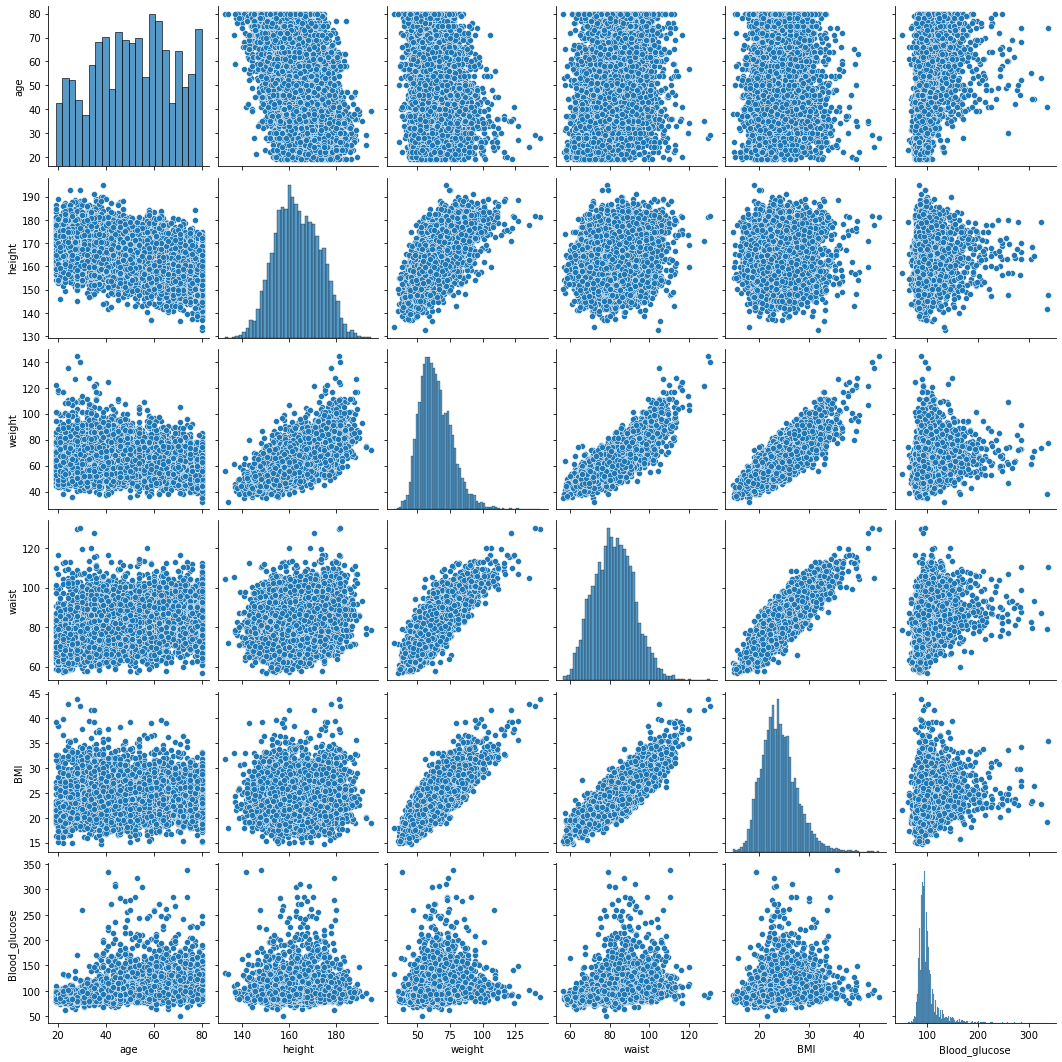

In [15]:
# pairplot의 활용
sns.pairplot(hn18)

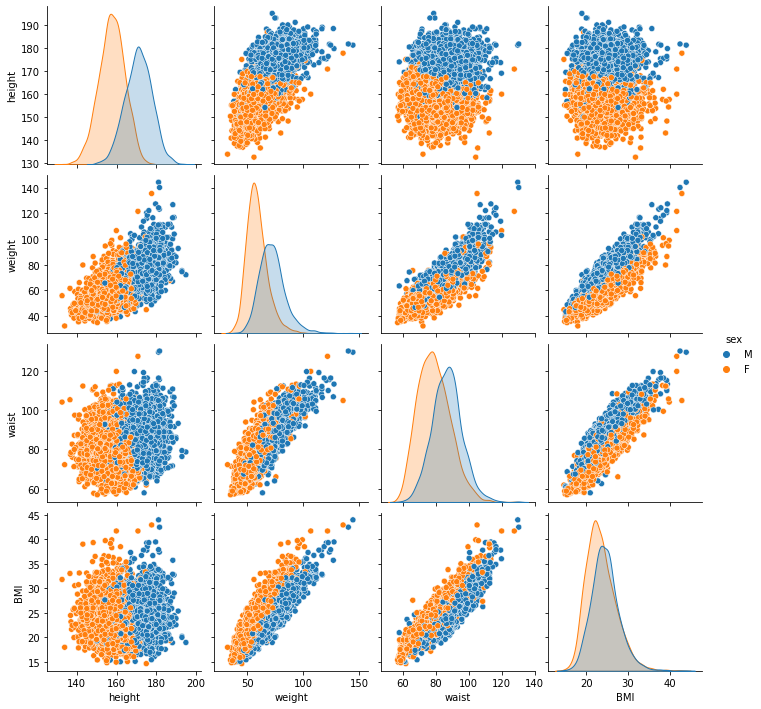

In [16]:
sns.pairplot(hn18, hue = 'sex', vars = ['height', 'weight', 'waist', 'BMI'])

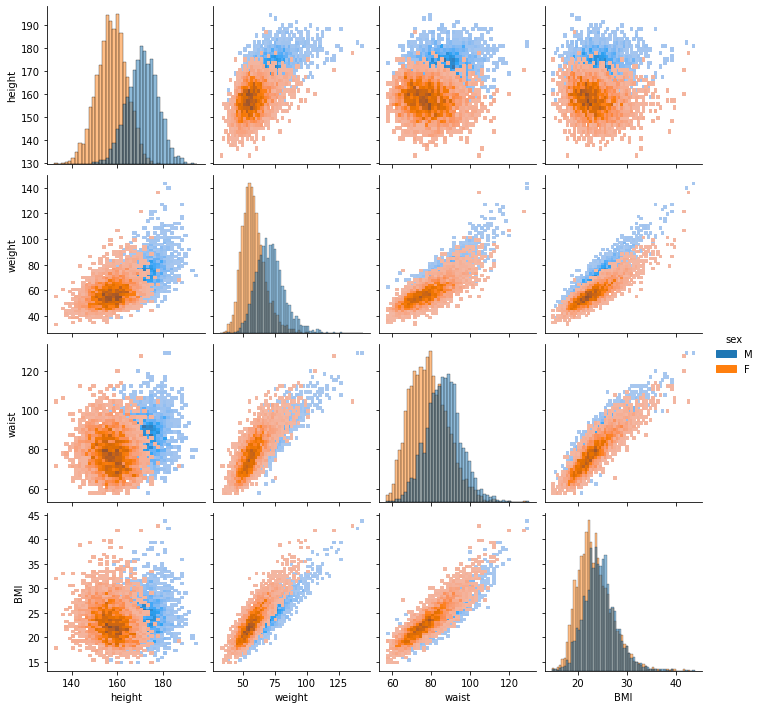

In [17]:
sns.pairplot(hn18, hue = 'sex', vars = ['height', 'weight', 'waist', 'BMI'], kind = 'hist')

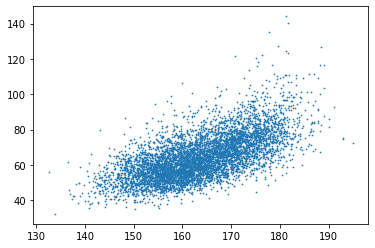

In [18]:
# 상관관계 그리기 (scatter plot)
# plt.scatter(x, y, s = dot_size)
plt.scatter(x = hn18.height, y = hn18.weight, s = 0.5)

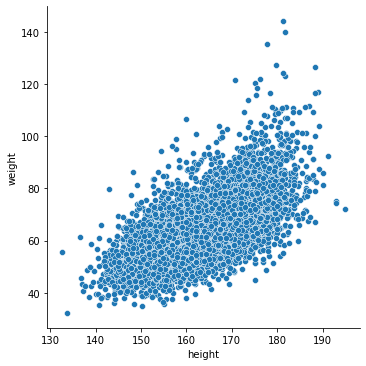

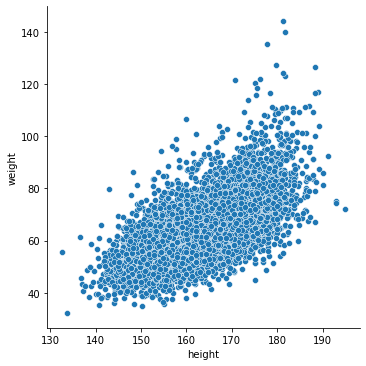

In [19]:
# 상관관계 그리기 (Seaborn - relplot)
# 아래 2가지 문법 모두 가능.

sns.relplot(x = hn18.height, y = hn18.weight)
sns.relplot(data = hn18, x = 'height', y = 'weight')

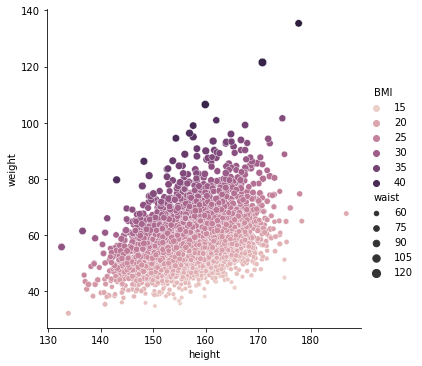

In [20]:
## relplot 활용 예시.
## 더 자세한 활용법은 
sns.relplot(data = hn18[hn18.sex == 'F'], x = 'height', y = 'weight', hue = 'BMI', size = 'waist')

<AxesSubplot:xlabel='height', ylabel='weight'>

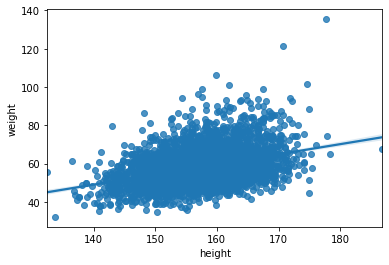

In [21]:
## Seaborn의 regplot (regression plot)
# 데이터의 분포에 더해 추세선(linear regression)을 그림
sns.regplot(data = hn18[hn18.sex == 'F'], x = 'height', y = 'weight')

<AxesSubplot:xlabel='height', ylabel='weight'>

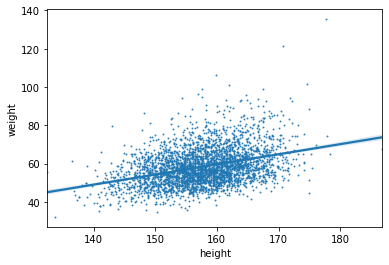

In [22]:
sns.regplot(data = hn18[hn18.sex == 'F'], x = 'height', y = 'weight', scatter_kws = {'s':1})

In [23]:
## 상관관계(correlation coefficient) 계산
# Numpy의 corrcoef() 사용
np.corrcoef(hn18.height, hn18.weight)

array([[1.   , 0.646],
       [0.646, 1.   ]])

In [24]:
# 데이터프레임 객체의 .corr() 메소드 사용
hn18.corr()

,age,height,weight,waist,BMI,Blood_glucose
age,1.000000,-0.406219,-0.174858,0.251193,0.098261,0.265082
height,-0.406219,1.000000,0.645940,0.251477,0.058626,0.005115
weight,-0.174858,0.645940,1.000000,0.805254,0.794064,0.166949
waist,0.251193,0.251477,0.805254,1.000000,0.862315,0.309163
BMI,0.098261,0.058626,0.794064,0.862315,1.000000,0.219306
Blood_glucose,0.265082,0.005115,0.166949,0.309163,0.219306,1.000000


In [25]:
# Spearman correlation (Rho) 계산 
hn18.corr(method = 'spearman')

,age,height,weight,waist,BMI,Blood_glucose
age,1.000000,-0.389521,-0.138079,0.264450,0.134641,0.379342
height,-0.389521,1.000000,0.649883,0.255734,0.059390,0.006681
weight,-0.138079,0.649883,1.000000,0.798830,0.772431,0.255379
waist,0.264450,0.255734,0.798830,1.000000,0.858868,0.417098
BMI,0.134641,0.059390,0.772431,0.858868,1.000000,0.335235
Blood_glucose,0.379342,0.006681,0.255379,0.417098,0.335235,1.000000


In [26]:
# .corrwith() 메소드: 특정 열 혹은 다른 특정 Series나 DataFrame 객체와 상관관계 계산
hn18.corrwith(hn18.Blood_glucose, method = 'spearman')

age              0.379342
height           0.006681
weight           0.255379
waist            0.417098
BMI              0.335235
Blood_glucose    1.000000
dtype: float64

<AxesSubplot:xlabel='waist', ylabel='Blood_glucose'>

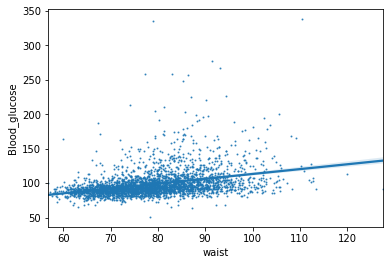

In [27]:
# 허리둘레(waist)와 혈당값(Blood_glucose)의 상관관계 비교 (regplot)
sns.regplot(data = hn18[hn18.sex == 'F'], x = 'waist', y = 'Blood_glucose', scatter_kws = {'s':1})

(60.0, 120.0, 50.0, 150.0)

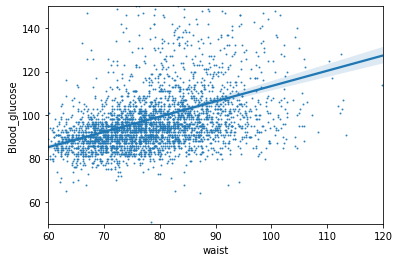

In [28]:
sns.regplot(data = hn18[hn18.sex == 'F'], x = 'waist', y = 'Blood_glucose', scatter_kws = {'s':1})
plt.axis([60, 120, 50, 150])

In [29]:
## Seaborn의 다양한 시각화 기능은 https://seaborn.pydata.org/tutorial.html 를 참조.